In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def PCA(data):
    data_std = (data - np.mean(data, axis=0))
    cov_matrix= np.cov(data_std, rowvar = False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors

In [31]:
def PVE_plot(sorted_eigenvalues, PC= 10):
      explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
      cumulative_explained_variance = np.cumsum(explained_variance_ratio)
      threshold = 0.7
      index_threshold = np.argmax(cumulative_explained_variance >= threshold) +1
      print(f'number of PC is needed to obtain threshold {index_threshold}')
      print(f"Eigenvalues for the first {PC} principal components")
      for i in range(PC):
        print(sorted_eigenvalues[i])

      explained_variance_ratio = explained_variance_ratio[:PC]
      cumulative_explained_variance= cumulative_explained_variance[:PC]
      print(f"Explained Variance Ratio): {explained_variance_ratio}")
      print(f"Cumulative Explained Variance: {cumulative_explained_variance}")


      # Plot the explained variance
      plt.figure(figsize=(10, 6))
      plt.bar(range(1, PC+1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
      plt.step(range(1, PC+1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance')

      plt.axhline(y=0.7, color='r', linestyle='--', label='Threshold (0.7)', alpha=0.7)

      # Customize the plot
      plt.xlabel('Principal Component')
      plt.ylabel('Proportion of Variance Explained')
      plt.title('Variance Explained by the First 10 Principal Components')
      plt.xticks(range(1, PC-1))
      plt.legend(loc='best')
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.show()


In [4]:
path = '/content/drive/MyDrive/CS464 HW2/resized_images'

X=np.zeros((10000,64*64,3), dtype=np.float32)
for i, filename in enumerate(sorted(os.listdir(path))[:10000]):
  image_path = os.path.join(path, filename)
  with Image.open(image_path) as img:
    img = img.resize((64,64), Image.BILINEAR).convert('RGB')
    img_array = np.array(img, dtype=np.float32)
    X[i] = img_array.reshape(64*64, 3)

X1 = X[:, :, 0]
X2 = X[:, :, 1]
X3 = X[:, :, 2]


In [ ]:
print(X1.shape)
print(X2.shape)
print(X3.shape)

In [5]:
#RED
eigenvalues_R, eigenvectors_R= PCA(X1)


number of PC is needed to obtain threshold 11
Eigenvalues for the first 10 principal components
4600717.586819145
1490755.8754692425
1079651.5829886955
931817.1539745108
861886.5363941012
697277.5420442013
459258.50099416065
325894.55316580733
267429.29340046446
259337.42982663386
Explained Variance Ratio): [0.28929081 0.09373798 0.06788795 0.05859219 0.05419499 0.04384446
 0.02887794 0.02049209 0.01681582 0.01630701]
Cumulative Explained Variance: [0.28929081 0.38302879 0.45091674 0.50950894 0.56370393 0.60754839
 0.63642634 0.65691842 0.67373424 0.69004125]


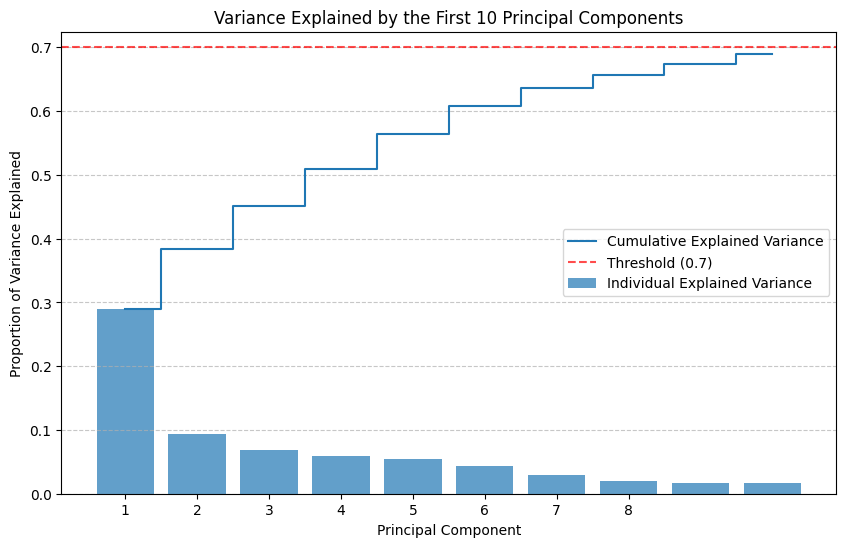

In [32]:
PVE_plot(eigenvalues_R, PC= 10)

array([0.28929081, 0.09373798, 0.06788795, 0.05859219, 0.05419499,
       0.04384446, 0.02887794, 0.02049209, 0.01681582, 0.01630701])

In [27]:
#GREEN
eigenvalues_G, eigenvectors_G= PCA(X2)


number of PC is needed to obtain threshold 10
Eigenvalues for the first 10 principal components
4621729.32408237
1234628.457935047
1179543.7571754807
836123.8534740739
592944.4778394281
570948.1405875253
370480.4229524834
267659.5379296004
239956.92929649496
231448.24905352114
Explained Variance Ratio): [0.32041101 0.08559319 0.08177433 0.05796603 0.04110711 0.03958217
 0.02568433 0.01855605 0.01663551 0.01604563]
Cumulative Explained Variance: [0.32041101 0.4060042  0.48777852 0.54574455 0.58685166 0.62643383
 0.65211815 0.67067421 0.68730972 0.70335535]


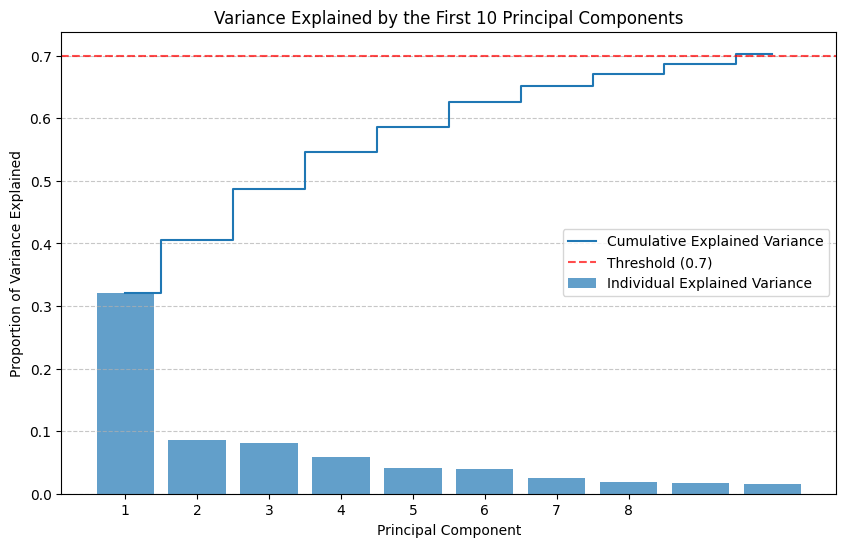

In [33]:
PVE_plot(eigenvalues_G, PC= 10)

In [35]:
#Blue
eigenvalues_B, eigenvectors_B= PCA(X3)


number of PC is needed to obtain threshold 9
Eigenvalues for the first 10 principal components
5119412.263078236
1319275.1986132448
1263102.2613604714
852713.1117981825
567015.7768030802
499813.03312134504
370474.39966926596
255939.47895188766
242112.74198298907
231403.20145525128
Explained Variance Ratio): [0.34357938 0.08854058 0.08477065 0.05722818 0.03805416 0.03354398
 0.02486367 0.01717688 0.01624892 0.01553017]
Cumulative Explained Variance: [0.34357938 0.43211996 0.51689061 0.57411879 0.61217295 0.64571693
 0.67058059 0.68775747 0.7040064  0.71953657]


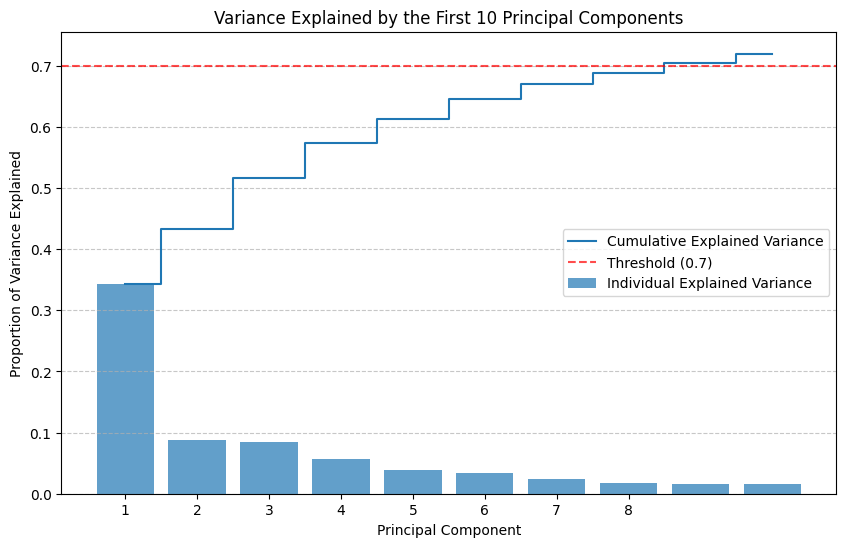

In [34]:
PVE_plot(eigenvalues_B, PC= 10)

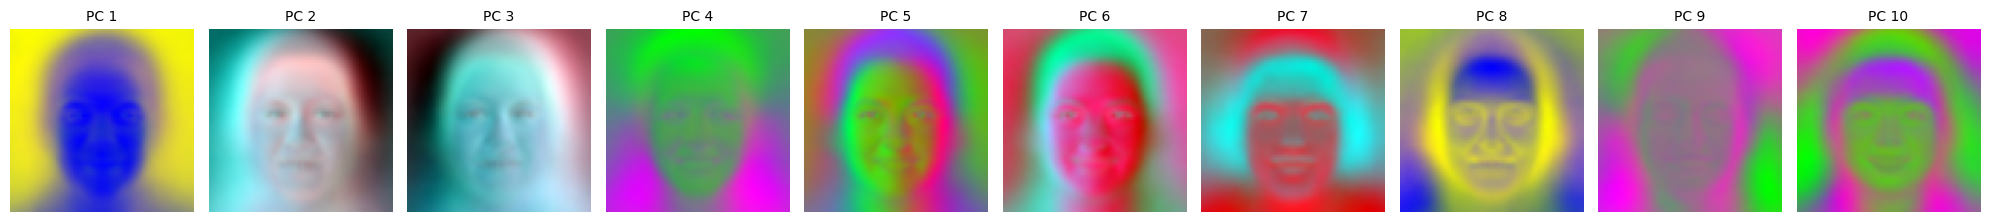

In [38]:

def normalize_to_image(eigenvector, image_shape):
    normalized = (eigenvector - np.min(eigenvector)) / (np.max(eigenvector) - np.min(eigenvector)) * 255
    return normalized.reshape(image_shape).astype('uint8')

image_size = (64, 64)
fig, axes = plt.subplots(1, 10, figsize=(20, 5))

for i in range(10):
    red_channel = normalize_to_image(eigenvectors_R[:, i], image_size)
    green_channel = normalize_to_image(eigenvectors_G[:, i], image_size)
    blue_channel = normalize_to_image(eigenvectors_B[:, i], image_size)

    rgb_image = np.stack([red_channel, green_channel, blue_channel], axis=-1)

    axes[i].imshow(rgb_image)
    axes[i].set_title(f'PC {i + 1}', fontsize=10)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

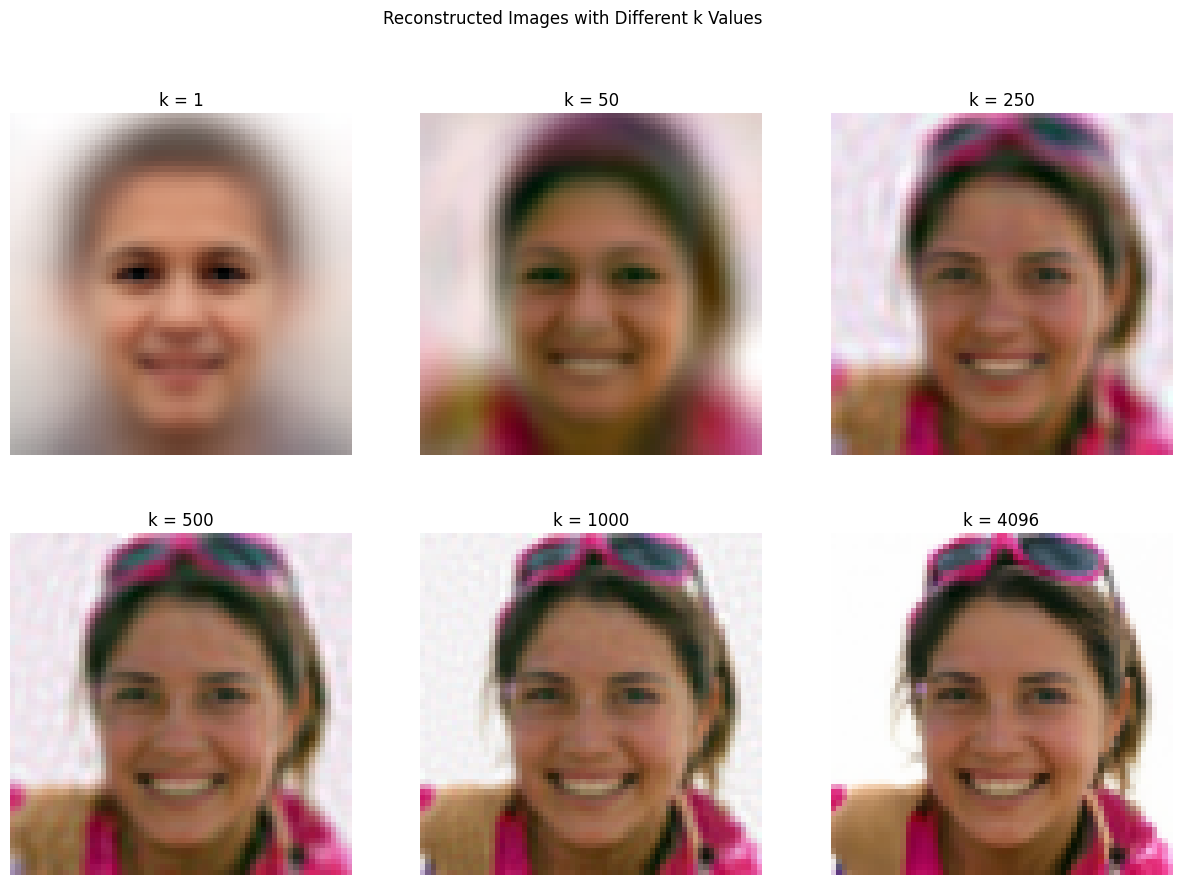

In [12]:
def reconstruct_image(X_image, eigenvectors, PC, mean):
    projections = np.dot(X_image , eigenvectors[:, :PC])
    rec_image = np.dot(eigenvectors[:, :PC],projections)  + mean
    return rec_image

def normalize(X):
    return (X - X.min()) / (X.max() - X.min())


k_values = [1, 50, 250, 500, 1000, 4096]
mean = np.mean(X, axis=0)
X_image = X[0]
X_mean_centered = X_image - np.mean(X, axis=0)
reconstructed_images = []


for k in k_values:
    R_reconstructed = reconstruct_image(X_mean_centered[:, 0], eigenvectors_R, k, mean[:, 0])
    G_reconstructed = reconstruct_image(X_mean_centered[:, 1], eigenvectors_G, k, mean[:, 1])
    B_reconstructed = reconstruct_image(X_mean_centered[:, 2], eigenvectors_B, k, mean[:, 2])

    R_reconstructed = normalize(R_reconstructed)
    G_reconstructed = normalize(G_reconstructed)
    B_reconstructed = normalize(B_reconstructed)

    rgb_reconstructed = np.stack((R_reconstructed, G_reconstructed, B_reconstructed), axis=-1)
    reconstructed_images.append(rgb_reconstructed.reshape(64, 64, 3))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Reconstructed Images with Different k Values")

for i, ax in enumerate(axes.flat):
    ax.imshow(np.clip(reconstructed_images[i], 0, 1))
    ax.set_title(f"k = {k_values[i]}")
    ax.axis("off")

plt.show()